In [35]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import graphviz
from sklearn.utils import shuffle
from dataclasses import dataclass


In [36]:
df = pd.read_csv("CSV/A-0.csv")

In [37]:
df

,playerID,B_G,B_AB,B_R,B_H,B_HR,B_RBI,B_SB,B_SO,PI_W,...,FI_G,FI_GS,FI_InnOuts,FI_A,FI_E,FI_DP,ASF_NUM_YEARS,MAX_SAL,MAX_SAL_YEAR,inducted
0,bellja01,2063.0,1123.0,1963.0,394.0,860.0,91.0,60.0,25.0,NaN,...,2006.0,1903.0,50656.0,5609.0,220.0,1120.0,2.0,8050000.0,2001.0,N
1,jacksre01,2820.0,1551.0,2584.0,463.0,1702.0,228.0,115.0,164.0,NaN,...,2102.0,2057.0,53268.0,133.0,142.0,31.0,14.0,1102946.0,1986.0,Y
2,ryanbj01,560.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,...,560.0,0.0,1610.0,52.0,6.0,7.0,2.0,12000000.0,2009.0,NaN
3,plesada01,1064.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,65.0,...,1064.0,14.0,3216.0,100.0,3.0,6.0,3.0,2766667.0,1992.0,N
4,callijo01,1886.0,926.0,1757.0,321.0,840.0,74.0,51.0,73.0,NaN,...,1777.0,1690.0,45118.0,175.0,57.0,34.0,3.0,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20365,whittwa01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN
20366,willibo01,46.0,10.0,18.0,3.0,11.0,1.0,0.0,0.0,NaN,...,46.0,0.0,0.0,49.0,15.0,1.0,NaN,NaN,NaN,NaN
20367,williro01,188.0,1.0,4.0,1.0,3.0,0.0,0.0,0.0,11.0,...,188.0,0.0,715.0,56.0,0.0,6.0,NaN,NaN,NaN,NaN
20368,wilsocr02,139.0,54.0,101.0,16.0,40.0,3.0,1.0,0.0,NaN,...,145.0,92.0,2745.0,243.0,10.0,36.0,NaN,250000.0,2000.0,NaN


In [38]:
df['nominated'] = df.apply(lambda row: 1 if row['inducted'] in ['Y', 'N'] else 0, axis=1)

In [39]:
df['nominated'].value_counts()

0    19091
1     1279
Name: nominated, dtype: int64

In [40]:
df_shuffled = shuffle(df, random_state=42)
df_shuffled

,playerID,B_G,B_AB,B_R,B_H,B_HR,B_RBI,B_SB,B_SO,PI_W,...,FI_GS,FI_InnOuts,FI_A,FI_E,FI_DP,ASF_NUM_YEARS,MAX_SAL,MAX_SAL_YEAR,inducted,nominated
17410,maddemo01,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,3.0,64.0,2.0,2.0,0.0,NaN,NaN,NaN,NaN,0
14835,ussatdu01,5.0,4.0,3.0,0.0,2.0,0.0,0.0,0.0,NaN,...,0.0,0.0,7.0,0.0,1.0,NaN,NaN,NaN,NaN,0
6692,baergca01,1630.0,731.0,1583.0,279.0,774.0,59.0,24.0,41.0,NaN,...,1235.0,32810.0,3501.0,169.0,820.0,3.0,4750000.0,1997.0,N,1
13083,womacdo01,193.0,2.0,7.0,0.0,4.0,1.0,0.0,0.0,19.0,...,1.0,907.0,94.0,4.0,6.0,NaN,NaN,NaN,NaN,0
5653,hintoch01,1353.0,518.0,1048.0,152.0,443.0,130.0,50.0,27.0,NaN,...,959.0,26589.0,273.0,61.0,130.0,1.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,mosebro01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,0
11964,cruzje01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0
5390,cruzlu01,195.0,57.0,143.0,27.0,57.0,4.0,2.0,3.0,NaN,...,159.0,4375.0,428.0,13.0,67.0,NaN,505000.0,2013.0,NaN,0
860,friedma01,107.0,20.0,27.0,7.0,9.0,0.0,0.0,0.0,40.0,...,78.0,1341.0,101.0,6.0,5.0,NaN,NaN,NaN,NaN,0


In [41]:
df_fillNa = df_shuffled.fillna(0)

In [42]:
df_fillNa

,playerID,B_G,B_AB,B_R,B_H,B_HR,B_RBI,B_SB,B_SO,PI_W,...,FI_GS,FI_InnOuts,FI_A,FI_E,FI_DP,ASF_NUM_YEARS,MAX_SAL,MAX_SAL_YEAR,inducted,nominated
17410,maddemo01,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,3.0,64.0,2.0,2.0,0.0,0.0,0.0,0.0,0,0
14835,ussatdu01,5.0,4.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7.0,0.0,1.0,0.0,0.0,0.0,0,0
6692,baergca01,1630.0,731.0,1583.0,279.0,774.0,59.0,24.0,41.0,0.0,...,1235.0,32810.0,3501.0,169.0,820.0,3.0,4750000.0,1997.0,N,1
13083,womacdo01,193.0,2.0,7.0,0.0,4.0,1.0,0.0,0.0,19.0,...,1.0,907.0,94.0,4.0,6.0,0.0,0.0,0.0,0,0
5653,hintoch01,1353.0,518.0,1048.0,152.0,443.0,130.0,50.0,27.0,0.0,...,959.0,26589.0,273.0,61.0,130.0,1.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,mosebro01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0
11964,cruzje01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
5390,cruzlu01,195.0,57.0,143.0,27.0,57.0,4.0,2.0,3.0,0.0,...,159.0,4375.0,428.0,13.0,67.0,0.0,505000.0,2013.0,0,0
860,friedma01,107.0,20.0,27.0,7.0,9.0,0.0,0.0,0.0,40.0,...,78.0,1341.0,101.0,6.0,5.0,0.0,0.0,0.0,0,0


In [43]:
df_bal = df_fillNa.drop(df_fillNa[df_fillNa['nominated'] == 0][1300:].index)
df_bal
# df_ball = df_fillNa.drop()

,playerID,B_G,B_AB,B_R,B_H,B_HR,B_RBI,B_SB,B_SO,PI_W,...,FI_GS,FI_InnOuts,FI_A,FI_E,FI_DP,ASF_NUM_YEARS,MAX_SAL,MAX_SAL_YEAR,inducted,nominated
17410,maddemo01,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,3.0,64.0,2.0,2.0,0.0,0.0,0.0,0.0,0,0
14835,ussatdu01,5.0,4.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7.0,0.0,1.0,0.0,0.0,0.0,0,0
6692,baergca01,1630.0,731.0,1583.0,279.0,774.0,59.0,24.0,41.0,0.0,...,1235.0,32810.0,3501.0,169.0,820.0,3.0,4750000.0,1997.0,N,1
13083,womacdo01,193.0,2.0,7.0,0.0,4.0,1.0,0.0,0.0,19.0,...,1.0,907.0,94.0,4.0,6.0,0.0,0.0,0.0,0,0
5653,hintoch01,1353.0,518.0,1048.0,152.0,443.0,130.0,50.0,27.0,0.0,...,959.0,26589.0,273.0,61.0,130.0,1.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5051,fellebo01,570.0,99.0,193.0,28.0,99.0,1.0,2.0,0.0,266.0,...,34.0,843.0,510.0,25.0,28.0,8.0,0.0,0.0,Y,1
2433,wilheho01,1070.0,24.0,38.0,3.0,21.0,0.0,1.0,0.0,143.0,...,52.0,5853.0,373.0,11.0,17.0,5.0,0.0,0.0,Y,1
1685,biggicr01,2850.0,1844.0,3060.0,668.0,1175.0,414.0,124.0,68.0,0.0,...,2703.0,70913.0,5671.0,201.0,1174.0,7.0,9750000.0,2003.0,Y,1
16023,johnsra05,619.0,20.0,78.0,14.0,40.0,0.0,0.0,0.0,303.0,...,603.0,12409.0,448.0,57.0,18.0,10.0,16000000.0,2005.0,Y,1


In [44]:
df_allSal = df_fillNa.drop(df_fillNa[df_fillNa['MAX_SAL_YEAR'] == 0].index)
df_allSal.describe()

,B_G,B_AB,B_R,B_H,B_HR,B_RBI,B_SB,B_SO,PI_W,PI_L,...,FI_G,FI_GS,FI_InnOuts,FI_A,FI_E,FI_DP,ASF_NUM_YEARS,MAX_SAL,MAX_SAL_YEAR,nominated
count,5149.000000,5149.000000,5149.000000,5149.000000,5149.000000,5149.000000,5149.000000,5149.000000,5149.000000,5149.000000,...,5149.000000,5149.000000,5149.000000,5149.000000,5149.000000,5149.000000,5149.000000,5.149000e+03,5149.000000,5149.000000
mean,488.725578,163.851622,321.752379,60.961352,155.024471,23.862109,10.450961,9.868324,17.556030,17.171684,...,444.766751,323.574869,8645.735483,371.489415,24.891241,88.891241,0.561468,2.404984e+06,2003.240823,0.082152
std,549.410754,300.124595,570.585894,109.274742,293.300957,66.347157,23.261256,26.628669,37.310373,32.698750,...,501.173490,492.676017,12951.129639,883.290432,43.039128,231.726128,1.609618,3.974338e+06,9.724062,0.274623
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000e+04,1985.000000,0.000000
25%,98.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,90.000000,8.000000,724.000000,18.000000,2.000000,2.000000,0.000000,3.270000e+05,1995.000000,0.000000
50%,282.000000,13.000000,28.000000,4.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,259.000000,91.000000,2507.000000,61.000000,7.000000,7.000000,0.000000,5.500000e+05,2004.000000,0.000000
75%,670.000000,185.000000,391.000000,73.000000,168.000000,14.000000,9.000000,7.000000,18.000000,20.000000,...,610.000000,410.000000,10434.000000,224.000000,27.000000,34.000000,0.000000,2.800000e+06,2012.000000,0.000000
max,3562.000000,2295.000000,4256.000000,746.000000,2150.000000,1406.000000,335.000000,688.000000,355.000000,292.000000,...,3528.000000,3437.000000,90298.000000,8375.000000,386.000000,2034.000000,19.000000,3.300000e+07,2016.000000,1.000000


In [45]:
df

,playerID,B_G,B_AB,B_R,B_H,B_HR,B_RBI,B_SB,B_SO,PI_W,...,FI_GS,FI_InnOuts,FI_A,FI_E,FI_DP,ASF_NUM_YEARS,MAX_SAL,MAX_SAL_YEAR,inducted,nominated
0,bellja01,2063.0,1123.0,1963.0,394.0,860.0,91.0,60.0,25.0,NaN,...,1903.0,50656.0,5609.0,220.0,1120.0,2.0,8050000.0,2001.0,N,1
1,jacksre01,2820.0,1551.0,2584.0,463.0,1702.0,228.0,115.0,164.0,NaN,...,2057.0,53268.0,133.0,142.0,31.0,14.0,1102946.0,1986.0,Y,1
2,ryanbj01,560.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,...,0.0,1610.0,52.0,6.0,7.0,2.0,12000000.0,2009.0,NaN,0
3,plesada01,1064.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,65.0,...,14.0,3216.0,100.0,3.0,6.0,3.0,2766667.0,1992.0,N,1
4,callijo01,1886.0,926.0,1757.0,321.0,840.0,74.0,51.0,73.0,NaN,...,1690.0,45118.0,175.0,57.0,34.0,3.0,NaN,NaN,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20365,whittwa01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,0
20366,willibo01,46.0,10.0,18.0,3.0,11.0,1.0,0.0,0.0,NaN,...,0.0,0.0,49.0,15.0,1.0,NaN,NaN,NaN,NaN,0
20367,williro01,188.0,1.0,4.0,1.0,3.0,0.0,0.0,0.0,11.0,...,0.0,715.0,56.0,0.0,6.0,NaN,NaN,NaN,NaN,0
20368,wilsocr02,139.0,54.0,101.0,16.0,40.0,3.0,1.0,0.0,NaN,...,92.0,2745.0,243.0,10.0,36.0,NaN,250000.0,2000.0,NaN,0


In [46]:
df_fillNa['nominated'] == 1

17410    False
14835    False
6692      True
13083    False
5653     False
         ...  
11284    False
11964    False
5390     False
860      False
15795    False
Name: nominated, Length: 20370, dtype: bool

In [47]:
trainFeatures = ['B_G', 'B_AB', 'B_R', 'B_H', 'B_HR', 'B_RBI', 'B_SB', 'B_SO',
                'PI_W', 'PI_L', 'PI_G', 'PI_CG', 'PI_SV', 'PI_H', 
			        'PI_ER', 'PI_HR', 'PI_BB', 'PI_SO', 'PI_ERA', 'PI_R',
		        'FI_G', 'FI_GS', 'FI_InnOuts', 'FI_A', 'FI_E', 'FI_DP',
                'ASF_NUM_YEARS']
df_X = df_fillNa[trainFeatures]

trainFeaturesWithSal = trainFeatures + ['MAX_SAL', 'MAX_SAL_YEAR']
df_X_Sal = df_fillNa[trainFeaturesWithSal]

In [48]:
df_X_bal = df_bal[trainFeatures]
df_y_bal = df_bal['nominated']

In [49]:
df_y = df_fillNa['nominated']

In [50]:
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(df_X_bal, df_y_bal, test_size=0.2, random_state=42)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)
X_trainSal, X_testSal, y_trainSal, y_testSal = train_test_split(df_X_Sal, df_y, test_size=0.2, random_state=42)

In [52]:
df_allSal_X = df_allSal[trainFeaturesWithSal]
df_allSal_y = df_allSal['nominated']
X_trainOnlySal, X_testOnlySal, y_trainOnlySal, y_testOnlySal = train_test_split(df_allSal_X, df_allSal_y, test_size=0.2, random_state=42)

In [53]:
y_testSal

13333    0
18650    0
8229     0
7398     0
7261     0
        ..
10045    0
6858     1
14897    0
11075    0
17864    0
Name: nominated, Length: 4074, dtype: int64

In [54]:
def maxDepthIterator(X_train, X_test, y_train, y_test):
    clf_data = [0, 0, 0, ()]
    max_acc = 0
    for i in range(1,50):
        clf = DecisionTreeClassifier(max_depth=i, min_samples_leaf=3, min_samples_split=10)
        clf = clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > max_acc:
            max_acc = acc
            clf_data[0] = clf
            clf_data[1] = acc
            clf_data[2] = i
            clf_data[3] = (y_test, y_pred)

    return clf_data

In [55]:
from dataclasses import dataclass
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from itertools import product

class DecisionTreeResult:
    def __init__(self, clf: DecisionTreeClassifier = None, max_accuracy: float = 0, 
                 max_depth: int = None,  min_samples_split: int = None, min_samples_leaf:
                int = None, y_test: pd.DataFrame = None, y_predicted: pd.DataFrame = None):       
        self.clf = clf
        self.max_accuracy = max_accuracy
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.y_test = y_test
        self.y_predicted = y_predicted
        
    def isImprovement(self, new_accuracy: float):
        return new_accuracy > self.max_accuracy
    
    def updateData(self, clf, new_accuracy, hyper_params, y_test, y_predicted):
        self.clf = clf
        self.max_depth, self.min_samples_split, self.min_samples_leaf = hyper_params
        self.max_accuracy = new_accuracy
        self.y_test = y_test
        self.y_predicted = y_predicted
        

def hyperParameterOptimizer(X_train, X_test, y_train, y_test):
    max_depth_options = range(1, 27, 1)
    min_samples_split_options = range(2, 101, 1)
    min_samples_leaf_options = range(1, 101, 1)
    hyperparameter_options = product(max_depth_options, min_samples_split_options, min_samples_leaf_options)
    length = len(list(hyperparameter_options))
    print(f"Number of hyperparameter configurationdddds: {length}")
    clf_data = DecisionTreeResult()
    count = 0
    for hyper_params in hyperparameter_options:
        count += 1
        clf = DecisionTreeClassifier(max_depth=hyper_params[0], min_samples_split=hyper_params[1], min_samples_leaf=hyper_params[2])
        clf = clf.fit(X_train, y_train)
        y_predicted = clf.predict(X_test)
        new_accuracy = accuracy_score(y_test, y_predicted)
        if clf_data.isImprovement(new_accuracy):
            clf_data.updateData(clf, new_accuracy, hyper_params, y_test, y_predicted)

    return clf_data

In [56]:
clf_bal_data = maxDepthIterator(X_train_bal, X_test_bal, y_train_bal, y_test_bal)

In [57]:
confusion_matrix(clf_bal_data[3][0], clf_bal_data[3][1])

array([[234,  32],
       [ 23, 227]])

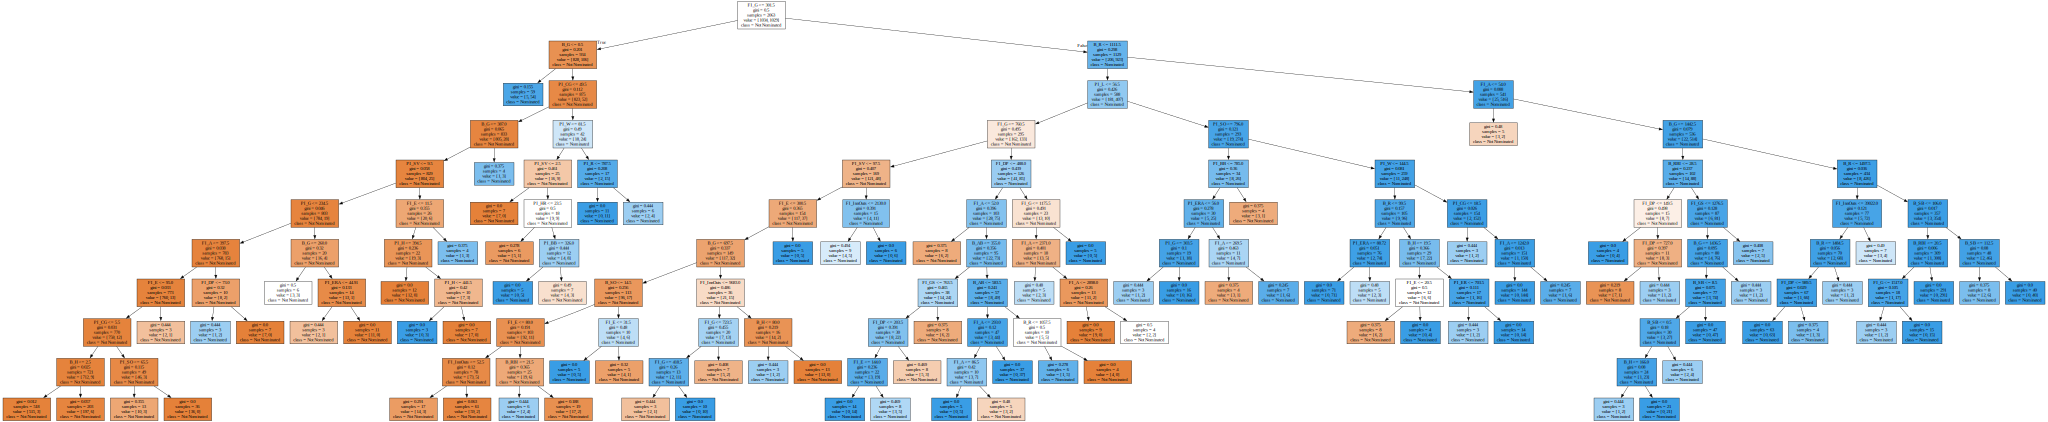

In [58]:
dot_data = tree.export_graphviz(clf_bal_data[0], out_file='dot_file', 
                                feature_names=X_train.columns,
                                class_names=["Not Nominated", "Nominated"],
                                filled=True)
graphviz.Source.from_file("taskAFinalModel.dot")

In [59]:
clf_data_all = maxDepthIterator(X_train, X_test, y_train, y_test)

In [60]:
clf_data_all

[DecisionTreeClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=10),
 0.9599901816396662,
 7,
 (13333    0
  18650    0
  8229     0
  7398     0
  7261     0
          ..
  10045    0
  6858     1
  14897    0
  11075    0
  17864    0
  Name: nominated, Length: 4074, dtype: int64,
  array([0, 0, 0, ..., 0, 0, 0]))]

In [61]:
clf_data_only_sal = maxDepthIterator(X_trainOnlySal, X_testOnlySal, y_trainOnlySal, y_testOnlySal)

In [62]:
clf_data_only_sal

[DecisionTreeClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=10),
 0.9679611650485437,
 7,
 (17335    0
  15138    0
  14603    0
  15152    0
  159      1
          ..
  17129    0
  11967    0
  1043     0
  2190     0
  10475    0
  Name: nominated, Length: 1030, dtype: int64,
  array([0, 0, 0, ..., 0, 0, 0]))]

In [63]:
clf_OnlySal = DecisionTreeClassifier(max_depth=6)
clf_OnlySal = clf_OnlySal.fit(X_trainOnlySal, y_trainOnlySal)

In [64]:
y_predOnlySal = clf_OnlySal.predict(X_testOnlySal)
confusion_matrix(y_testOnlySal, y_predOnlySal)

array([[930,  16],
       [ 26,  58]])

In [65]:
accuracy_score(y_testOnlySal, y_predOnlySal)

0.9592233009708738

In [66]:
clf = DecisionTreeClassifier(max_depth=6)
clf = clf.fit(X_train, y_train)

clfSal = DecisionTreeClassifier(max_depth=6)
clfSal = clfSal.fit(X_trainSal, y_trainSal)

In [ ]:
y_pred = clf.predict(X_test)
y_predSal = clfSal.predict(X_testSal)

No sal, max depth 8
array([[3753,   50],
       [ 136,  135]], dtype=int64)
No sal, max depth 6
array([[3755,   48],
       [ 136,  135]], dtype=int64)

Sal, max depth 8
array([[3756,   47],
       [ 129,  142]], dtype=int64)
Sal, max depth 6
array([[3769,   34],
       [ 133,  138]], dtype=int64)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
confusion_matrix(y_testSal, y_predSal)

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
accuracy_score(y_test, y_pred)
# accuracy_score(y_testSal, y_predSal)

In [ ]:
print(clf.tree_.max_depth)
help(clf.tree_)

In [ ]:
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(clf_bal[0], fontsize=10)
# plt.show()
# tree.plot_tree(clf_bal[0])

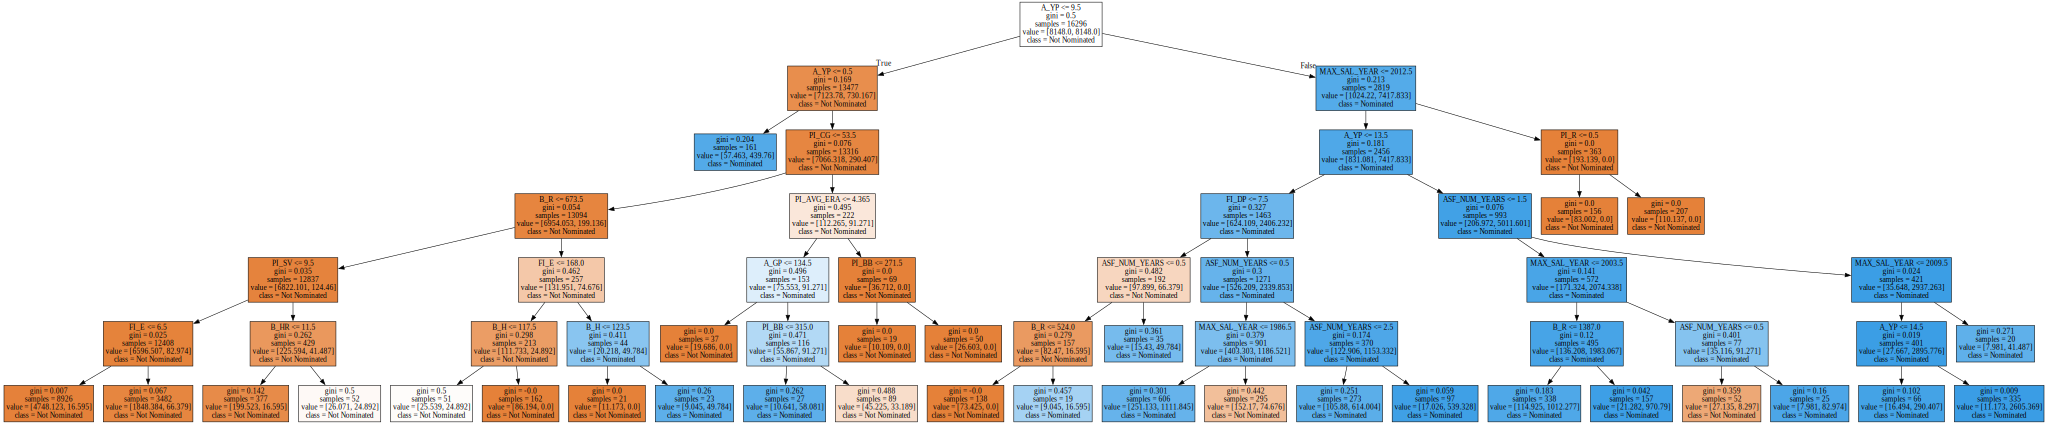

In [68]:
graphviz.Source.from_file("taskAFinalModel.dot")

y_train Value Counts:
False    15314
True       982
Name: nominated, dtype: int64
Accuracy = 0.9126165930289641
ROC AUC Score: 0.9109923700868896
Confusion Matrix: 
        False  True
False   3448   329
True      27   270


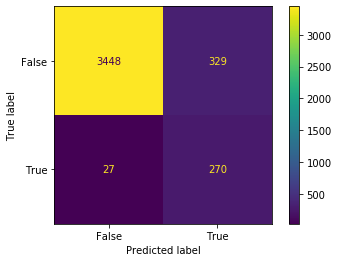

In [69]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, roc_auc_score
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import graphviz
from sklearn.utils import shuffle

if __name__ == "__main__":
    # Read CSV file that our SQL Query Generated as a pandas DataFrame
    df = pd.read_csv("CSV/A-1.csv")
    # Adding 'nominated' column to the dataFrame
    df['nominated'] = df.apply(lambda row: True if row['inducted'] in ['Y', 'N'] else False, axis=1)
    # Shuffling Data
    df = shuffle(df, random_state=42)
    # Filling the 'NaN' values with 0
    df = df.fillna(0)

    # Create train and test data
    train_features = ['B_AB', 'B_R', 'B_H', 'B_HR', 'B_RBI', 'B_SB', 'B_SO',
                    'PI_W', 'PI_L', 'PI_CG', 'PI_SV', 'PI_H', 
                        'PI_ER', 'PI_HR', 'PI_BB', 'PI_SO', 'PI_AVG_ERA', 'PI_R',
                    'FI_G', 'FI_GS', 'FI_InnOuts', 'FI_A', 'FI_E', 'FI_DP',
                    'ASF_NUM_YEARS', 'MAX_SAL', 'MAX_SAL_YEAR', 'A_YP', 'A_G_ALL', 'A_GP']


    df_X = df[train_features]
    df_y = df['nominated']
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)
    
    # Create Model, make predictions and calculate metrics
    clf = DecisionTreeClassifier(max_depth=6, min_samples_split=6, min_samples_leaf=19 ,class_weight="balanced")
    clf = clf.fit(X_train, y_train)

    y_predicted = clf.predict(X_test)
    rocAuc_score = roc_auc_score(y_test, y_predicted)
    accuracy = accuracy_score(y_test, y_predicted)
    conf_matrix = confusion_matrix(y_test, y_predicted)

    # Output Results
    print(f"y_train Value Counts:\n{y_train.value_counts()}")
    print(f"Accuracy = {accuracy}")
    print(f"ROC AUC Score: {rocAuc_score}")
    confMatrix = pd.DataFrame(conf_matrix, columns =['False', 'True'], index = ["False", "True"]) 
    print(f"Confusion Matrix: \n {confMatrix}")
    plot_confusion_matrix(clf, X_test, y_test)
    # plt.savefig('pngs/taskA_finalModel_confMatrix.png')
    
    # tree.export_graphviz(clf, out_file='taskAFinalModel.dot', 
    #                             feature_names=X_train.columns,
    #                             class_names=["Not Nominated", "Nominated"],
    #                             filled=True)

[Text(185.20851063829787, 201.90857142857143, 'X[27] <= 9.5\ngini = 0.5\nsamples = 16296\nvalue = [8148.0, 8148.0]'),
 Text(89.04255319148936, 170.84571428571428, 'X[27] <= 0.5\ngini = 0.169\nsamples = 13477\nvalue = [7123.78, 730.167]'),
 Text(81.91914893617022, 139.78285714285715, 'gini = 0.204\nsamples = 161\nvalue = [57.463, 439.76]'),
 Text(96.1659574468085, 139.78285714285715, 'X[9] <= 53.5\ngini = 0.076\nsamples = 13316\nvalue = [7066.318, 290.407]'),
 Text(56.98723404255319, 108.72, 'X[1] <= 673.5\ngini = 0.054\nsamples = 13094\nvalue = [6954.053, 199.136]'),
 Text(28.493617021276595, 77.65714285714284, 'X[10] <= 9.5\ngini = 0.035\nsamples = 12837\nvalue = [6822.101, 124.46]'),
 Text(14.246808510638298, 46.59428571428572, 'X[22] <= 6.5\ngini = 0.025\nsamples = 12408\nvalue = [6596.507, 82.974]'),
 Text(7.123404255319149, 15.531428571428563, 'gini = 0.007\nsamples = 8926\nvalue = [4748.123, 16.595]'),
 Text(21.370212765957447, 15.531428571428563, 'gini = 0.067\nsamples = 3482\nv

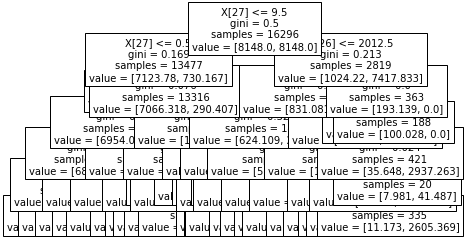

In [70]:
tree.plot_tree(clf, fontsize=10)
